




++++# Linear Regression - Assignment
## Geely Auto Case Study
### Submitted By : Abhijit Mandal
### Roll No : 210BTCSEAM024

#### Problem Statement:

A Chinese automobile company, Geely Auto, aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting car pricing in the American market, as they may differ from the Chinese market. 

The company wants to know the following things —

- Which variables are significant in predicting the price of a car?

- How well do those variables describe the price of a car?

Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the American market.

## Reading and Understanding the Data

Importing NumPy, Pandas and reading the automobiles dataset

In [2]:
# Suppressing the Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd

In [4]:
cars_df = pd.read_csv("CarPrice_Assignment_Dataset.csv")

In [5]:
# Check the head of the dataset
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Inspect the various aspects of the CarPrice dataframe

In [6]:
cars_df.shape

(205, 26)

In [7]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
cars_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Performing Data Cleaning Activity

In [9]:
cars_df.head(25)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,17859.167


In [10]:
#Extracting the name of the manufacturers from the car names and verifying it.
car_companies = pd.Series([car.split(" ")[0] for car in cars_df['CarName']],index = cars_df.index)
car_companies.head(25)

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
dtype: object

In [11]:
#Creating a new column named 'car_company' to store the name of the cars.
cars_df['car_company'] = car_companies
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [12]:
cars_df['car_company'].value_counts()

car_company
toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: count, dtype: int64

Replacing the misspelled words of the companies.

In [13]:
# volkswagen
cars_df.loc[(cars_df['car_company'] == "vw") | (cars_df['car_company'] =="vokswagen"), 'car_company'] = 'volkswagen'
# porsche
cars_df.loc[cars_df['car_company'] == "porcshce", 'car_company'] = 'porsche'
# toyota
cars_df.loc[cars_df['car_company'] == "toyouta", 'car_company'] = 'toyota'
# nissan
cars_df.loc[cars_df['car_company'] == "Nissan", 'car_company'] = 'nissan'
# mazda
cars_df.loc[cars_df['car_company'] == "maxda", 'car_company'] = 'mazda'
cars_df['car_company'].value_counts()

car_company
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64

Dropping the 'CarName' column from the 'cars_df' DataFrame.

In [14]:
cars_df.drop(columns= ['CarName'], axis = 1, inplace = True)
cars_df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'car_company'],
      dtype='object')

In [15]:
cars_df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


## Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

we'll make a pairplot of all the numeric variables

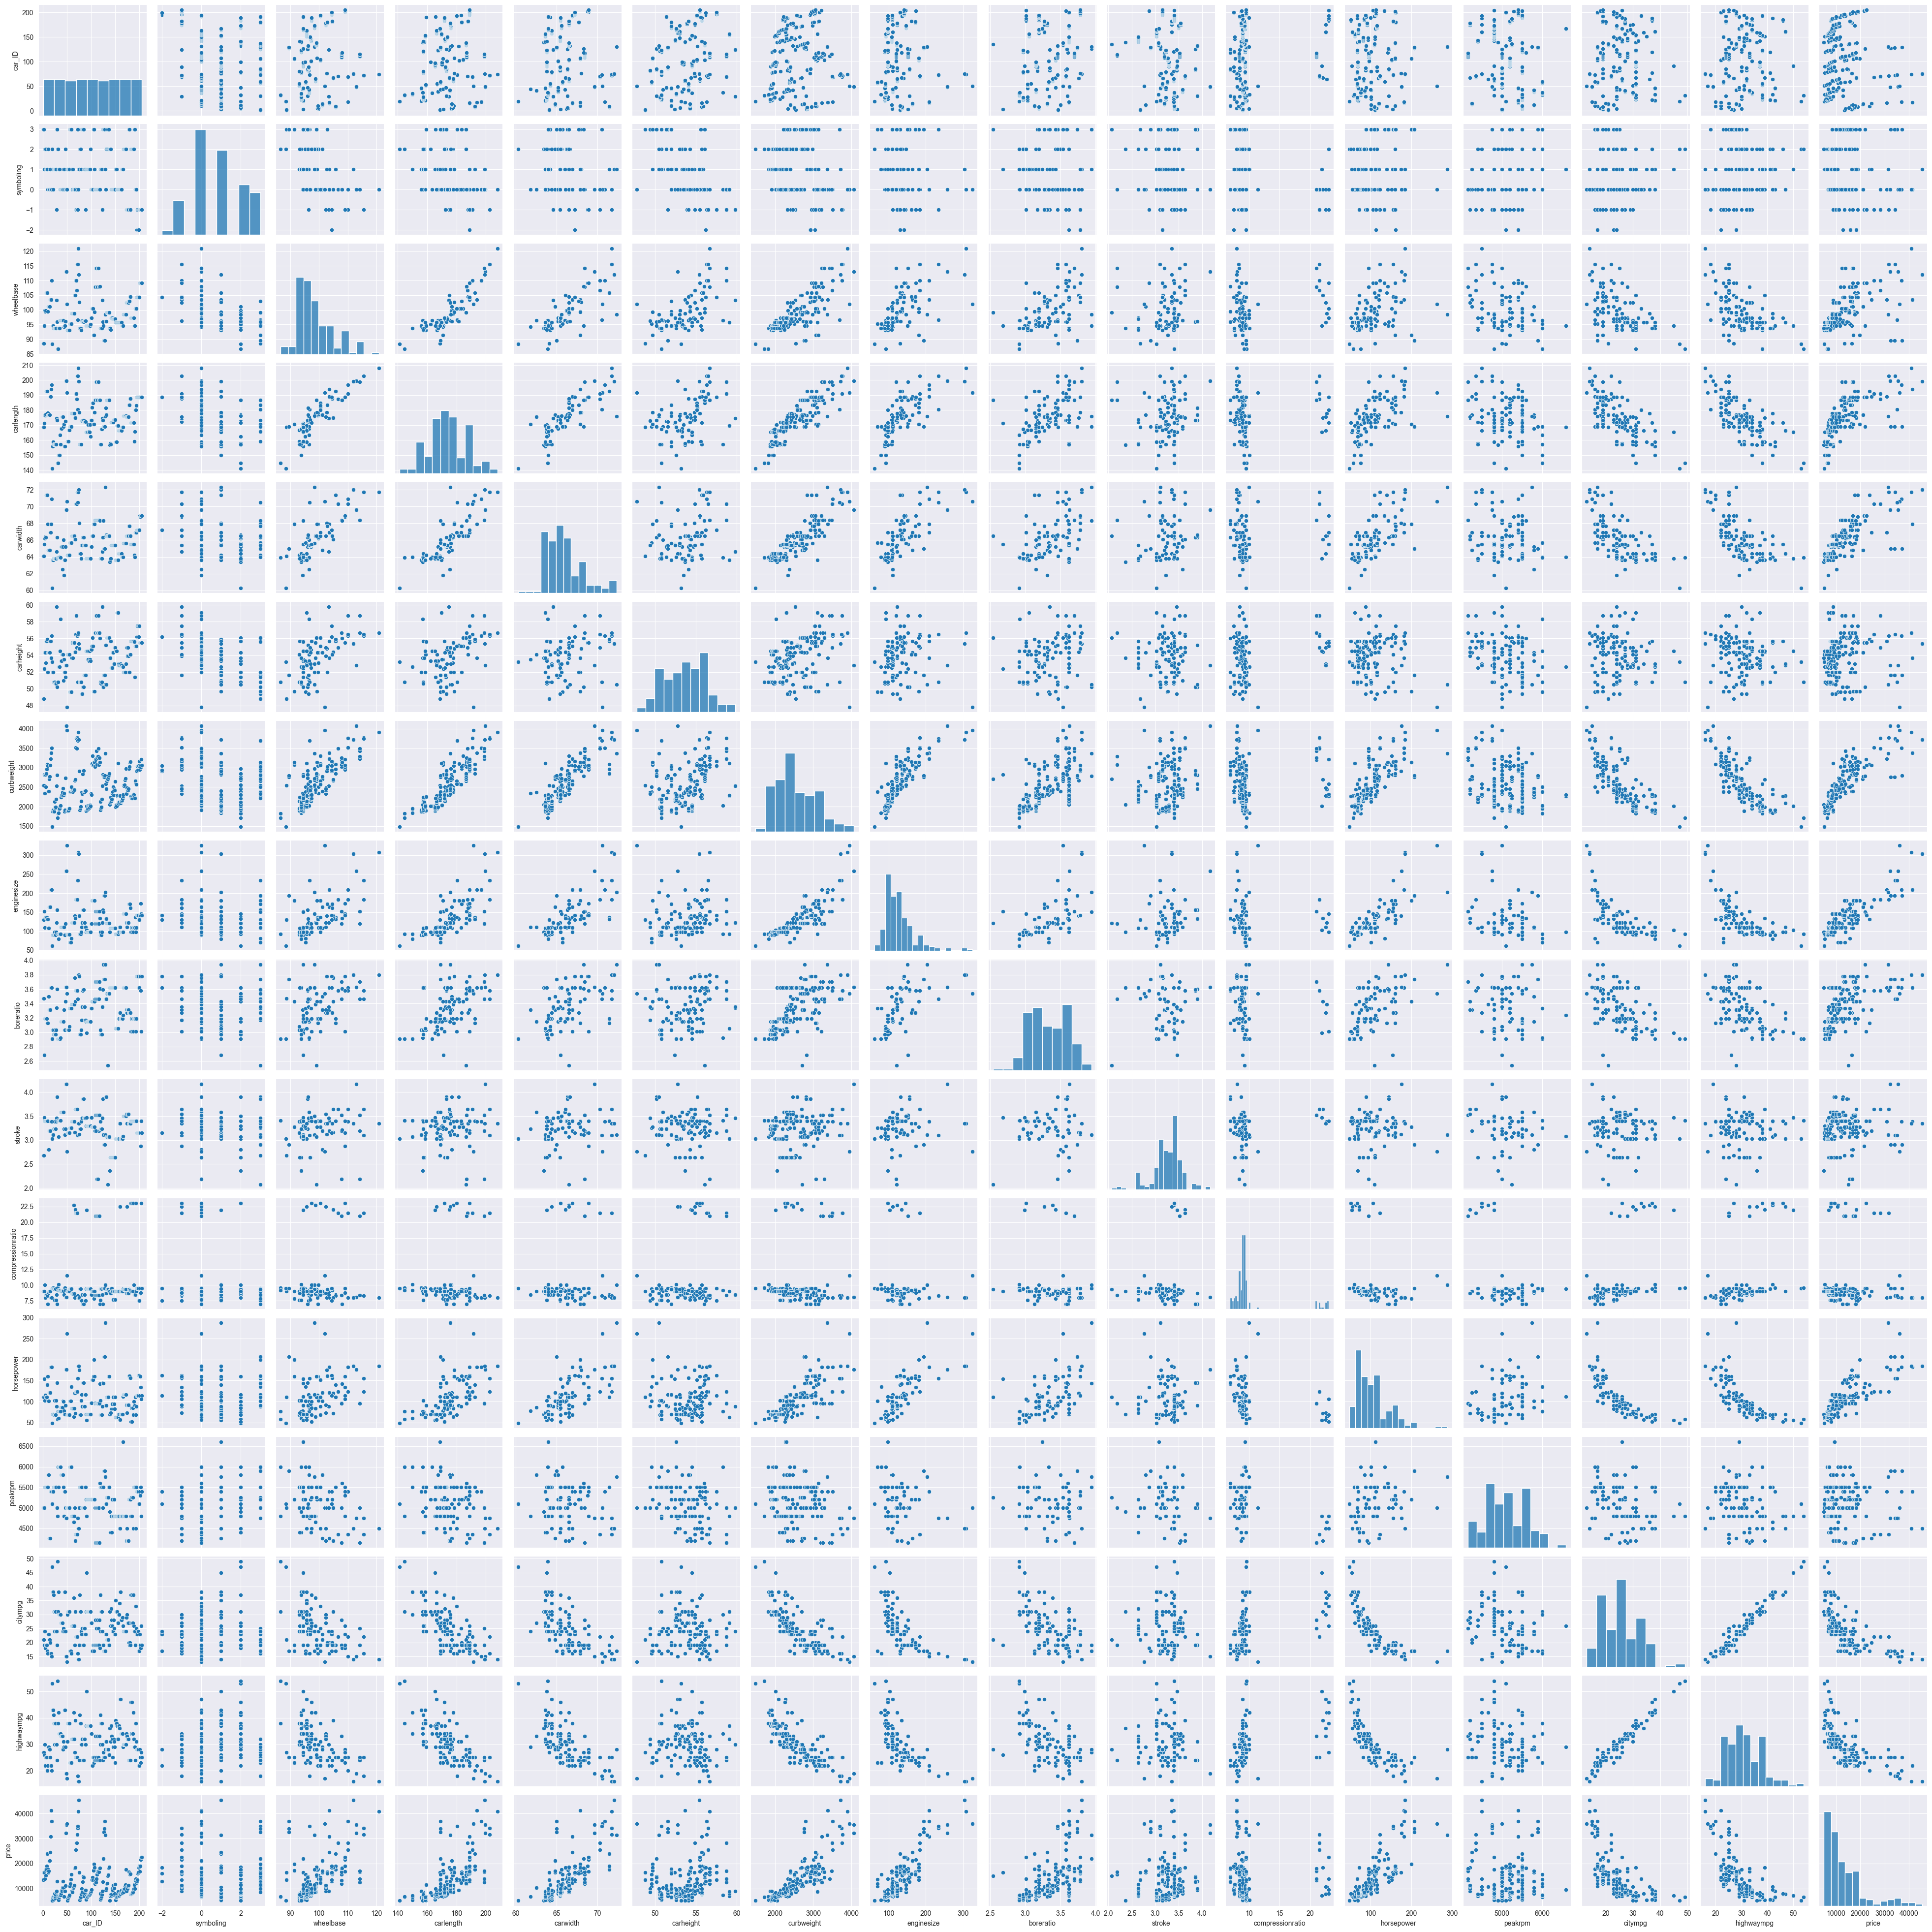

In [17]:
sns.pairplot(cars_df)
plt.show()

#### Data Preparation
- In order to fit a regression line, we would need numerical values and not string. Hence, we need to convert the categorical data to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [18]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

Extract all the numeric (float and int type) columns from the dataset.

In [19]:
cars_numeric_df = cars_df.select_dtypes(include = ['int64', 'float64'])
cars_numeric_df.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Drop the 'car_ID' column from the 'cars_numeric_df' DataFrame.

In [20]:
cars_numeric_df.drop(columns = ['car_ID'], axis = 1, inplace = True)
cars_numeric_df.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

Checking the correlation between the numeric features using heatmap.

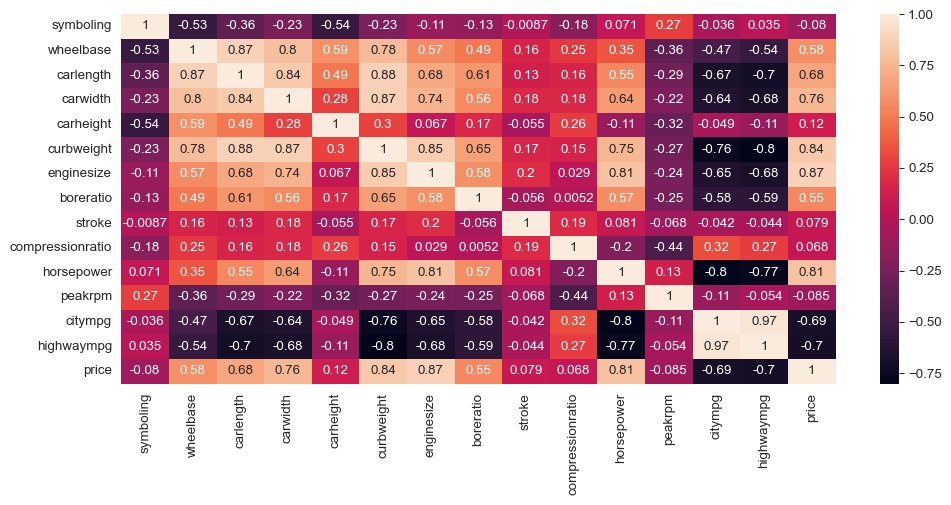

In [21]:
plt.figure(figsize = (12, 5), dpi = 96)
sns.heatmap(cars_numeric_df.corr(), annot=True)
plt.show()

Checking the first five data for the `doornumber` and `cylindernumber`

In [22]:
cars_df[['doornumber', 'cylindernumber']].head(5)

,doornumber,cylindernumber
0,two,four
1,two,four
2,two,six
3,four,four
4,four,five


Counting the occurrence of each value in the `cylindernumber` column.

In [23]:
cars_df['cylindernumber'].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

Counting the occurrence of each value in the `doornumber` column.

In [24]:
cars_df['doornumber'].value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

Using the `map()` function to replace a words in a Pandas series to their corresponding numeric values.

In [25]:
words = pd.Series(["two", "three", "four", "five", "six", "eight", "twelve"])
words_dict = {"two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "eight": 8,"twelve": 12}
words = words.map(words_dict)
words

0     2
1     3
2     4
3     5
4     6
5     8
6    12
dtype: int64

Mapping the values of the `doornumber` and `cylindernumber` columns to their corresponding numeric values.

In [26]:
def num_map(series):
    return series.map(words_dict)
# Applying the function to the two columns
cars_df[['cylindernumber', 'doornumber']] = cars_df[['cylindernumber','doornumber']].apply(num_map, axis = 1)

Displaying the first five rows of the 'cylindernumber' and 'doornumber' columns.
Also, checking whether the data-types are integer or not.

In [27]:
print(cars_df[['cylindernumber', 'doornumber']].head())
print(cars_df[['cylindernumber', 'doornumber']].info())

   cylindernumber  doornumber
0               4           2
1               4           2
2               6           2
3               4           4
4               5           4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   cylindernumber  205 non-null    int64
 1   doornumber      205 non-null    int64
dtypes: int64(2)
memory usage: 3.3 KB
None


## Feature Encoding

Creating a DataFrame containing all the non-numeric type features.

In [28]:
cars_categorical_df = cars_df.select_dtypes(include = ['object'])
cars_categorical_df.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,car_company
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


Creating a DataFrame containing all the non-numeric type features.

In [29]:
cars_categorical_df = cars_df.select_dtypes(include = ['object'])
cars_categorical_df.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,car_company
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


Creating dummy variables for all the categorical type columns using the dummy coding process.

In [30]:
cars_dummies_df = pd.get_dummies(cars_categorical_df, drop_first = True, dtype= int)
cars_dummies_df.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Drop the categorical type columns from the `cars_df` DataFrame.

In [31]:
cars_df.drop(list(cars_categorical_df.columns), axis = 1, inplace = True)
cars_df

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,4,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,4,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,4,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,4,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,23.0,106,4800,26,27,22470.0


Concatenating the `cars_df` and `cars_dummies_df` DataFrames.

In [32]:
cars_df = pd.concat([cars_df, cars_dummies_df], axis = 1)
cars_df.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,0,0,0
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,0,0,0,0,0,0,0,0,0,0
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,...,0,0,0,0,0,0,0,0,0,0
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,...,0,0,0,0,0,0,0,0,0,0
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,...,0,0,0,0,0,0,0,0,0,0


Dropping the `Car_ID` column again after the concatenation of the two df.

In [33]:
cars_df.drop('car_ID', axis=1, inplace=True)

Getting the data-types of all the columns and the number of rows and columns in the `cars_df` DataFrame.

In [34]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   doornumber              205 non-null    int64  
 2   wheelbase               205 non-null    float64
 3   carlength               205 non-null    float64
 4   carwidth                205 non-null    float64
 5   carheight               205 non-null    float64
 6   curbweight              205 non-null    int64  
 7   cylindernumber          205 non-null    int64  
 8   enginesize              205 non-null    int64  
 9   boreratio               205 non-null    float64
 10  stroke                  205 non-null    float64
 11  compressionratio        205 non-null    float64
 12  horsepower              205 non-null    int64  
 13  peakrpm                 205 non-null    int64  
 14  citympg                 205 non-null    in

Splitting the `cars_df` Dataframe into the train and test sets.

In [35]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(cars_df, test_size = 0.3, random_state =42)

Creating separate data-frames for the feature and target variables for both the train and test sets.

In [36]:
features = list(cars_df.columns)
features.remove('price')
X_train = train_df[features]
y_train = train_df['price']
X_test = test_df[features]
y_test = test_df['price']
X_train.shape

(143, 59)

Normalising the numeric columns.

In [37]:
def standard_norm(series):
    new_series = (series - series.mean()) / series.std()
    return new_series

Normalising the features in train and test sets.

In [38]:
X_train[X_train.columns[:16]] = X_train[X_train.columns[:16]].apply(standard_norm, axis = 0)
X_test[X_train.columns[:16]] = X_test[X_train.columns[:16]].apply(standard_norm, axis = 0)
X_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
177,-1.494746,0.884304,0.571301,0.076145,0.234282,0.043705,-0.220606,-0.361807,-0.121004,-0.038773,...,0,0,0,0,0,0,0,1,0,0
75,0.124562,-1.122925,0.620694,0.301819,0.921744,0.406597,0.644684,-0.361807,0.313395,1.687015,...,0,0,0,0,0,0,0,0,0,0
174,-1.494746,0.884304,0.571301,0.076145,0.234282,0.446919,-0.178490,-0.361807,-0.410604,-0.185649,...,0,0,0,0,0,0,0,1,0,0
31,0.934216,-1.122925,-2.030063,-2.422386,-0.957319,-1.206257,-1.443881,-0.361807,-0.845003,-1.507529,...,0,0,0,0,0,0,0,0,0,0
12,-0.685092,-1.122925,0.373729,0.172863,-0.544842,0.204990,0.261812,1.392037,0.892594,-0.038773,...,0,0,0,0,0,0,0,0,0,0


# Building Linear Regression Model
Building a linear regression model using all the features to predict car prices.

In [39]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train, X_train_sm).fit()
lin_reg.params

const                     1.111326e+04
symboling                -2.592601e+02
doornumber                2.563005e+02
wheelbase                 4.621973e+02
carlength                -6.274075e+02
carwidth                  1.488550e+03
carheight                -3.300812e+02
curbweight                2.138008e+03
cylindernumber           -8.478692e+02
enginesize                4.083022e+03
boreratio                -1.027673e+03
stroke                   -7.593749e+01
compressionratio          4.652682e+02
horsepower                2.562853e+02
peakrpm                   8.317857e+02
citympg                   6.391211e+02
highwaympg               -2.399637e+02
fueltype_gas              6.290680e+03
aspiration_turbo          2.528179e+03
carbody_hardtop          -2.337527e+02
carbody_hatchback        -3.517083e+03
carbody_sedan            -3.523827e+03
carbody_wagon            -4.154162e+03
drivewheel_fwd           -8.505823e+02
drivewheel_rwd           -1.393007e+03
enginelocation_rear      

Printing the summary of the Linear Regression Report.

In [40]:
print(lin_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     67.51
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           3.52e-53
Time:                        14:05:49   Log-Likelihood:                -1214.5
No. Observations:                 143   AIC:                             2541.
Df Residuals:                      87   BIC:                             2707.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.11

Calculating the adjusted R-square value

In [41]:
num_rows = X_train.shape[0] # Number of rows or instances
num_predictors = X_train.shape[1] # Number of columns or feature (or independent) variables
r2_score = lin_reg.rsquared # R-squared (or coefficient of determination) value
adj_r2_score = 1 - ((1 - r2_score) * (num_rows - 1))/(num_rows - num_predictors- 1) # Adjusted R-squared calculation
adj_r2_score

0.9608296579974196

Finding the highly correlated features.

In [42]:
major_features = {}
for f in features:
    corr_coef = np.corrcoef(cars_df['price'], cars_df[f])[0, 1]
    if (corr_coef >= 0.5) or (corr_coef <= -0.5):
        major_features[f] = corr_coef
print("Number of features moderately to highly correlated with price =",len(major_features), "\n")
major_features

Number of features moderately to highly correlated with price = 15 


{'wheelbase': 0.57781559829215,
 'carlength': 0.6829200156779621,
 'carwidth': 0.759325299741511,
 'curbweight': 0.835304879337296,
 'cylindernumber': 0.7183049020002827,
 'enginesize': 0.8741448025245111,
 'boreratio': 0.5531732367984435,
 'horsepower': 0.8081388225362215,
 'citympg': -0.6857513360270399,
 'highwaympg': -0.6975990916465556,
 'drivewheel_fwd': -0.6019502965330916,
 'drivewheel_rwd': 0.6389565386618763,
 'fuelsystem_2bbl': -0.5013743424965742,
 'fuelsystem_mpfi': 0.5170749892680733,
 'car_company_buick': 0.5150940500571324}

Using RFE to eliminate few features from the dataset.

In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

RFE with 10 features.

In [44]:
skl_lin_reg = LinearRegression()
rfe1 = RFE(skl_lin_reg,n_features_to_select = 10)

Fit with 10 features.

In [45]:
rfe1.fit(X_train[major_features.keys()], y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

Printing the attributes.

In [46]:
print(major_features.keys(), "\n") # List of features out of which 10 best features are to be selected by RFE.
print(rfe1.support_, "\n") # Array containing the boolean values
print(rfe1.ranking_, "\n") # Ranking of the features selected by RFE

dict_keys(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd', 'fuelsystem_2bbl', 'fuelsystem_mpfi', 'car_company_buick']) 

[False False  True False  True  True  True  True  True  True  True False
 False  True  True] 

[5 3 1 4 1 1 1 1 1 1 1 6 2 1 1] 


Building a linear regression model using `statsmodel.api` module having the above 10 features selected using `RFE`.

In [47]:
import statsmodels.api as sm
rfe_features = X_train[major_features.keys()].columns[rfe1.support_]
X_train_rfe1 = X_train[rfe_features]
X_train_rfe1 = sm.add_constant(X_train_rfe1)
sm_lin_reg1 = sm.OLS(y_train, X_train_rfe1).fit()
print(sm_lin_reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     91.03
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           3.16e-54
Time:                        14:05:50   Log-Likelihood:                -1336.8
No. Observations:                 143   AIC:                             2696.
Df Residuals:                     132   BIC:                             2728.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.412e+04    618.02

Checking for the `VIF` values of the 10 features selected by `RFE` above.

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,citympg,19.90
7,highwaympg,17.69
3,enginesize,10.13
2,cylindernumber,6.79
0,const,6.53
5,horsepower,6.06
4,boreratio,2.89
1,carwidth,2.50
8,drivewheel_fwd,2.14
9,fuelsystem_mpfi,2.07


Use `RFE` to eliminate few features from the dataset.

In [49]:
skl_lin_reg2 = LinearRegression()
rfe2 = RFE(skl_lin_reg2, n_features_to_select=5)
rfe2.fit(X_train[major_features.keys()], y_train)
print(major_features.keys(), "\n")
print(rfe2.support_, "\n")
print(rfe2.ranking_, "\n")

dict_keys(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'horsepower', 'citympg', 'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd', 'fuelsystem_2bbl', 'fuelsystem_mpfi', 'car_company_buick']) 

[False False  True False False  True False  True False False  True False
 False False  True] 

[10  8  1  9  3  1  4  1  6  5  1 11  7  2  1] 


Building the linear regression model again using the most recently selected features by `RFE`

In [50]:
import statsmodels.api as sm
rfe_features = X_train[major_features.keys()].columns[rfe2.support_]
X_train_rfe2 = X_train[rfe_features]
X_train_rfe2 = sm.add_constant(X_train_rfe2)
sm_lin_reg2 = sm.OLS(y_train, X_train_rfe2).fit()
print(sm_lin_reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 03 Oct 2023   Prob (F-statistic):           2.00e-58
Time:                        14:05:50   Log-Likelihood:                -1339.8
No. Observations:                 143   AIC:                             2692.
Df Residuals:                     137   BIC:                             2709.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.436e+04    427.39

Checking again for the `VIF` values of the feature variables.

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,4.18
3,horsepower,3.35
0,const,3.11
1,carwidth,2.16
4,drivewheel_fwd,1.49
5,car_company_buick,1.46


Creating a list of final features and build a linear regression model using the `sklearn` module.

In [52]:
X_train_final = X_train_rfe2.drop(columns = 'const')
sk_lin_reg_final = LinearRegression().fit(X_train_final, y_train)
y_train_pred = sk_lin_reg_final.predict(X_train_final)
y_train_pred[:10]

array([11614.67148027, 20805.93850454,  9737.85451687,  6747.05425956,
       16681.44092811,  6824.7936787 , 19864.14770684, 10931.14320868,
        7165.9828108 , 15535.30134   ])

Evaluating the linear regression model using the `r2_score`,`mean_squared_error` & `mean_absolute_error` functions of the `sklearn` module.

In [53]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,mean_squared_log_error
print("Train set")
print('-' * 50)
train_r2_score = r2_score(y_train, y_train_pred)
train_adj_r2_score = 1 - (1 - train_r2_score) * (X_train.shape[0] - 1)/(X_train.shape[0] - X_train.shape[1] - 1)
print(f"R-squared = {train_r2_score:.3f}")
print(f"Adjusted R-squared = {train_adj_r2_score:.3f}")
print(f"Mean absolute error = {mean_absolute_error(y_train, y_train_pred):.3f}")
print(f"Mean squared error = {mean_squared_error(y_train, y_train_pred):.3f}")
print(f"Root mean squared error = {np.sqrt(mean_squared_error(y_train, y_train_pred)):.3f}")

Train set
--------------------------------------------------
R-squared = 0.868
Adjusted R-squared = 0.774
Mean absolute error = 2080.494
Mean squared error = 8042954.083
Root mean squared error = 2836.010


Evaluating the linear regression model based on `MSLE`.

In [54]:
print(f"Mean squared log error = {mean_squared_log_error(y_train,y_train_pred):.3f}")

Mean squared log error = 0.034


# Residual Analysis
Creating a histogram for the errors obtained in the predicted values for the train set.

Mean of residuals = 0.000


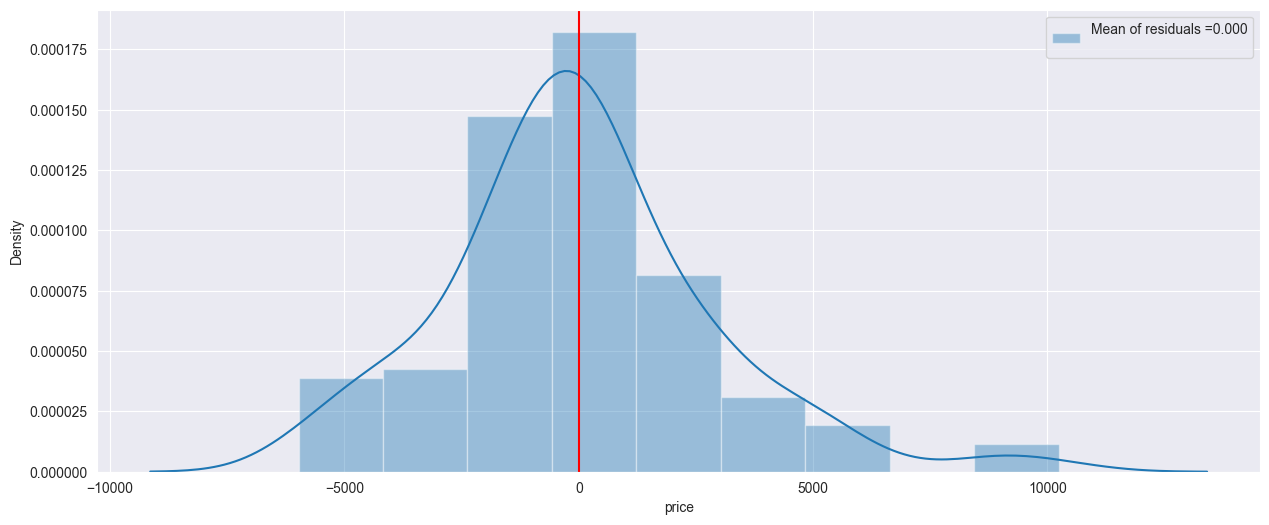

In [55]:
train_residuals = y_train - y_train_pred
print(f"Mean of residuals = {np.mean(train_residuals):.3f}\n")
plt.figure(figsize = (15, 6))
sns.distplot(train_residuals, bins = 'sturges', label = f"Mean of residuals ={np.mean(train_residuals):.3f}\n")
plt.axvline(x = np.mean(train_residuals), color = 'red')
plt.legend()
plt.show()

Creating a scatter plot between `train_residuals` and `y_train`.

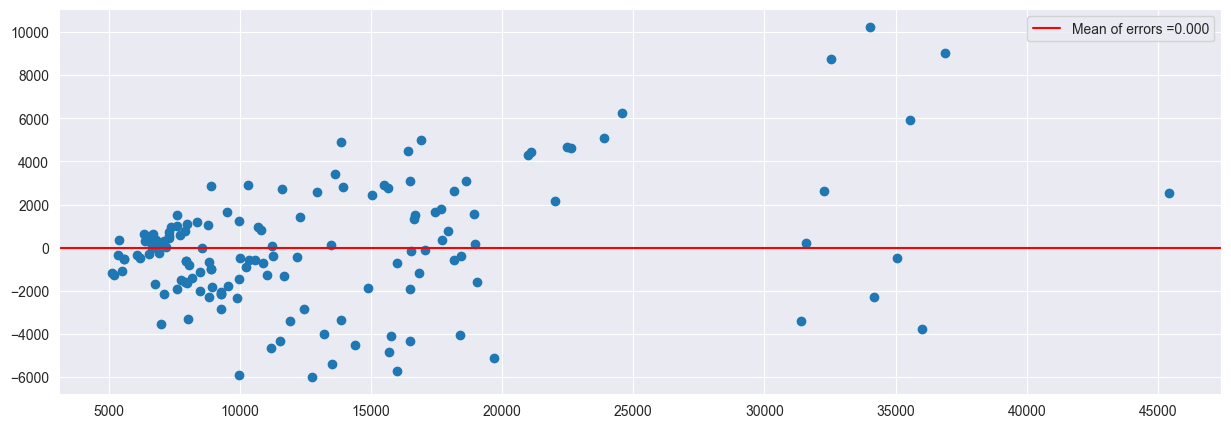

In [56]:
plt.figure(figsize = (15, 5))
plt.scatter(y_train, train_residuals)
plt.axhline(y = train_residuals.mean(), color = 'r', label = f'Mean of errors ={train_residuals.mean():.3f}')
plt.legend()
plt.show()

Scatter plot for actual values and predictions of the training data set

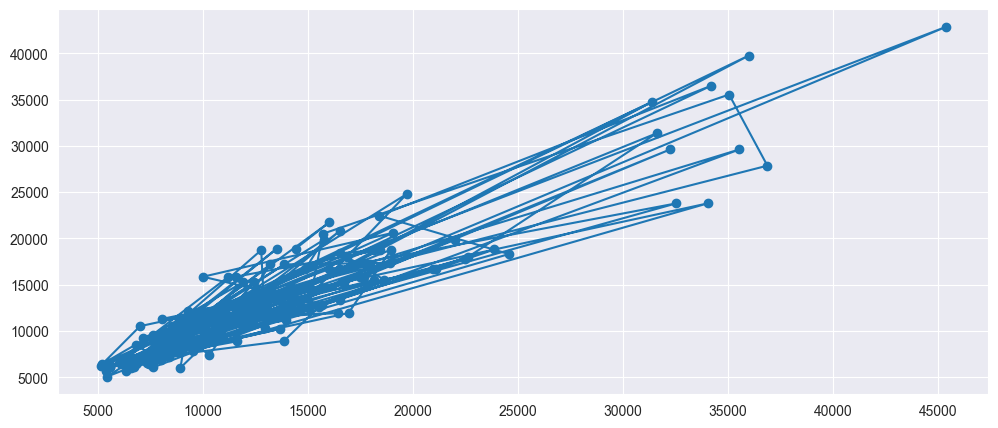

In [57]:
plt.figure(figsize = (12, 5))
plt.scatter(y_train, y_train_pred)
plt.plot(y_train, y_train_pred)
plt.show()

Predicting the car prices on the test set.

In [58]:
X_test = X_test[X_train_final.columns]
y_test_pred = sk_lin_reg_final.predict(X_test)
y_test_pred[:10]

array([25551.02324283, 20149.47788471, 11279.52529162, 13225.58115796,
       31017.07788154,  6944.38671721,  7429.93375271,  7562.49609129,
       10510.58085045,  7276.13263097])

Evaluating the linear regression model using the `r2_score`,`mean_squared_error` & `mean_absolute_error`, `mean_squared_log_error` functions of the `sklearn` module.

In [59]:
print("Test set")
print('-' * 50)
test_r2_score = r2_score(y_test, y_test_pred)
test_adj_r2_score = 1 - (1 - test_r2_score) * (X_test.shape[0] - 1)/(X_test.shape[0] - X_test.shape[1] - 1)
print(f"R-squared = {test_r2_score:.3f}")
print(f"Adjusted R-squared = {test_adj_r2_score:.3f}")
print(f"Mean absolute error = {mean_absolute_error(y_test, y_test_pred):.3f}")
print(f"Mean squared error = {mean_squared_error(y_test, y_test_pred):.3f}")
print(f"Root mean squared error = {np.sqrt(mean_squared_error(y_test,y_test_pred)):.3f}")
print(f"\nMean squared log error = {mean_squared_log_error(y_test, y_test_pred):.3f}")

Test set
--------------------------------------------------
R-squared = 0.791
Adjusted R-squared = 0.772
Mean absolute error = 2566.663
Mean squared error = 14513862.919
Root mean squared error = 3809.706

Mean squared log error = 0.133


Creating a histogram for the errors obtained in the predicted values for the testing set.

Mean of residuals = -694.585


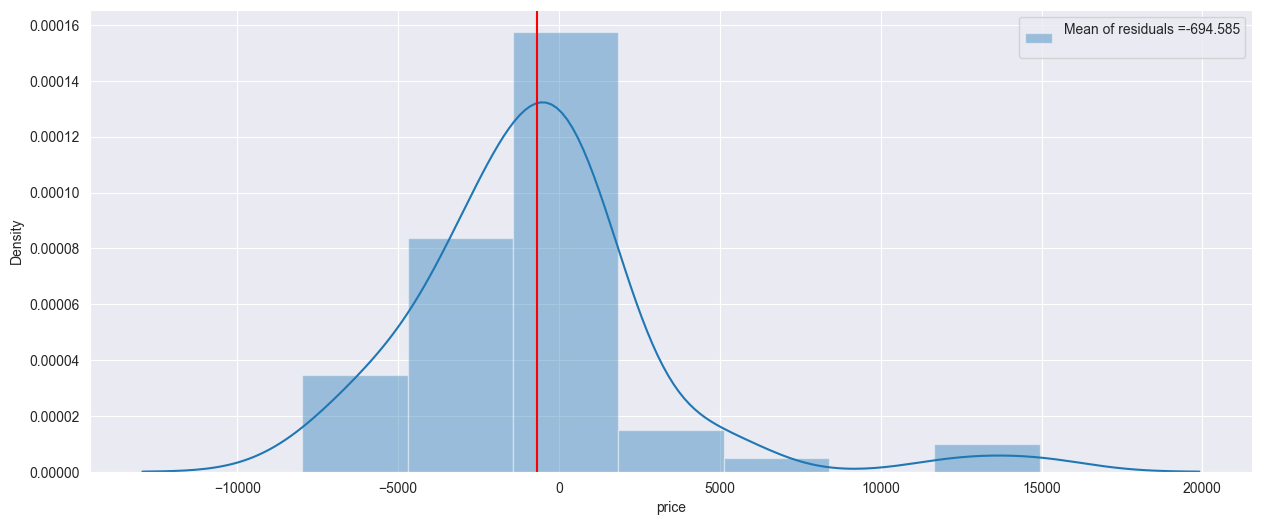

In [60]:
test_residuals = y_test - y_test_pred
print(f"Mean of residuals = {np.mean(test_residuals):.3f}\n")
plt.figure(figsize = (15, 6))
sns.distplot(test_residuals, bins = 'sturges', label = f"Mean of residuals ={np.mean(test_residuals):.3f}\n")
plt.axvline(x = np.mean(test_residuals), color = 'red')
plt.legend()
plt.show()

Creating a scatter plot for the errors obtained in the actual values for the test set for checking `homoscedasticity`.

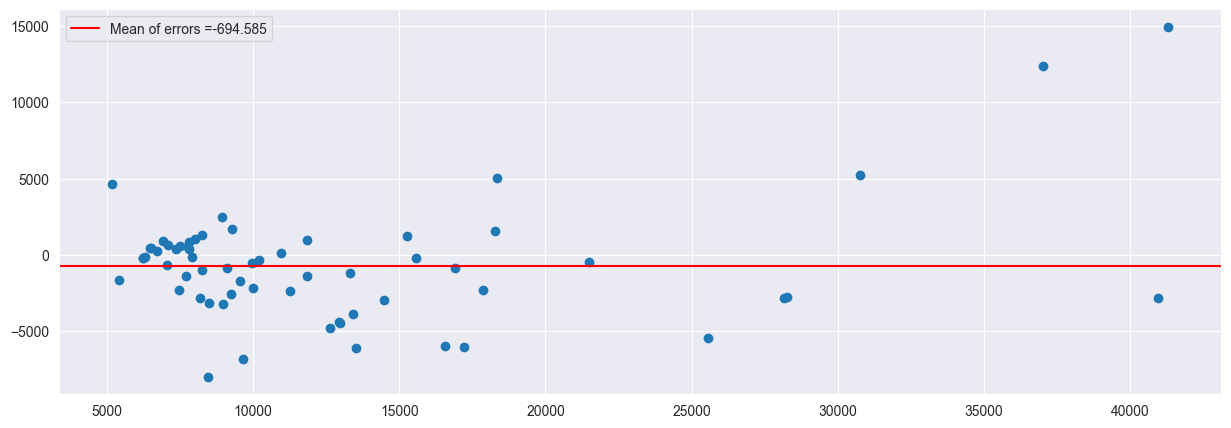

In [61]:
plt.figure(figsize = (15, 5))
plt.scatter(y_test, test_residuals)
plt.axhline(y = test_residuals.mean(), color = 'r', label = f'Mean of errors ={test_residuals.mean():.3f}')
plt.legend()
plt.show()

Creating a scatter plot for the actual values and the predictions of the testing dataset.

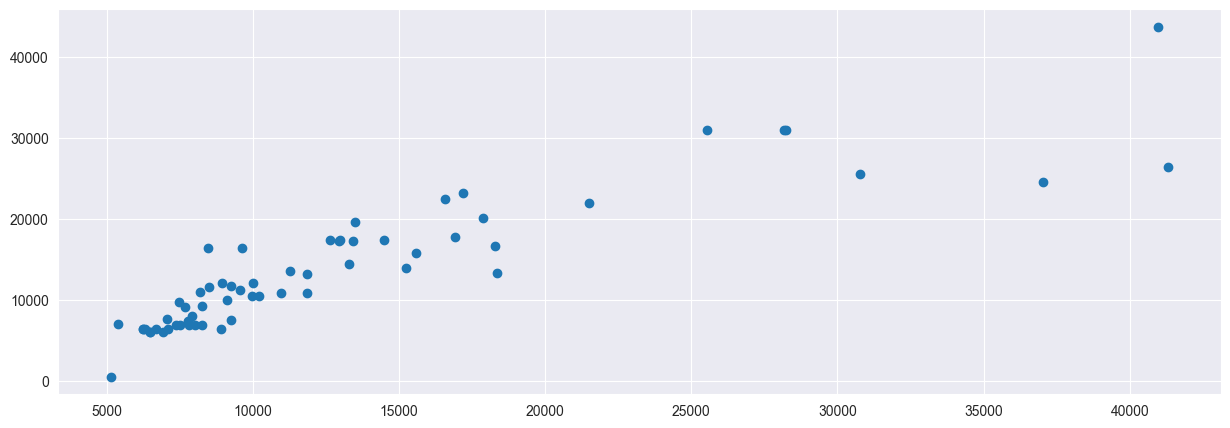

In [62]:
plt.figure(figsize = (15, 5))
plt.scatter(y_test, y_test_pred)
plt.show()

# Final Conclusion
So finally the most important features and their corresponding regression coeffients are :-

### Feature Coefficient

- carwidth &rarr; 1696.2271

- enginesize &rarr; 2636.6328

- horsepower &rarr; 2363.8354

- drivewheel_fwd &rarr; -2016.6827

- car_company_buick &rarr; 7984.8761

Hence, the regression equation is

### $Y = 14360 + 1696.2271x1 + 2636.6328x2 + 2363.8354x3 − 2016.6827x4 + 7984.8761x5$

where

- *Y* is the _price_ of a car

- *x1* is _carwidth_

- *x2* is _enginesize_

- *x3* is _horsepower_

- *x4* is _drivewheel_fwd_

- *x5* is _car_company_buick_

In [63]:
y_test_predicted = sk_lin_reg_final.predict(X_test)
y_test_predicted

array([25551.02324283, 20149.47788471, 11279.52529162, 13225.58115796,
       31017.07788154,  6944.38671721,  7429.93375271,  7562.49609129,
       10510.58085045,  7276.13263097, 14486.03728225,  9250.31139032,
       16720.43266737, 12159.04422098, 43756.19844728,  6030.50677992,
         514.23412947, 17429.43784914, 11003.84938953, 10510.58085045,
       11657.42517524, 19585.43610556,  6944.38671721,  6026.34779575,
        6446.94292479, 26373.19170517, 16431.17440906, 17310.70960759,
        6944.38671721, 17310.70960759, 31017.07788154,  6446.94292479,
        8047.1894639 , 21949.83291857,  9075.67119688, 31017.07788154,
       13593.20400664, 10852.80593179,  6407.91399376, 17429.43784914,
        9758.15228182, 13338.08289713, 15801.74229365,  6030.50677992,
        6944.38671721,  9968.73994414,  6446.94292479,  7713.92762314,
       17789.13160427, 17429.43784914,  6407.91399376, 22531.98321124,
        6439.18888289, 12159.04422098,  6944.38671721, 13992.73620485,
      

In [64]:
errors = y_test_predicted - y_test
errors

15     -5208.976757
9       2290.310885
100     1730.525292
132     1375.581158
68      2769.077882
           ...     
56      -992.194068
128   -12403.126057
76      1675.455834
144     2541.834966
104     6055.773683
Name: price, Length: 62, dtype: float64